# Exploratory Data Analysis

 - Space between gaps
 - Position of first gap in passage
 - Gaps per passage
 - Gaps per word
 - Word length of gapped words
 - Word frequency of gapped words
 - POS of gapped words (SpaCy)


In [135]:
from collections import Counter
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import spacy
from wordfreq import word_frequency

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

df = pd.read_parquet("../data/CLOTH/cloth.parquet")
df = df[df.source != "high515"] # This item has no options.
df = df.reset_index(drop=True)
df

,article,options,answers,source,split,level
0,It is well known that Albert Einstein was one ...,"[[paper, food, water, air], [hold, take, carry...","[A, A, C, C, B, B, A, D]",high839,train,high
1,Douglas was my cousin. I first met him when he...,"[[day, week, month, year], [parent, cousin, un...","[D, B, A, D, C, B, B, A, C, D]",high2970,train,high
2,"Two weeks before Christmas, Mother told me we ...","[[wanted, lacked, refused, prepared], [also, s...","[B, A, C, B, A, A, B, D, C, C, B, D, B, A, B, D]",high849,train,high
3,"In 1930, a young African American, Vivien T. T...","[[always, often, occasionally, never], [chance...","[D, B, A, C, B, A, D, C, B, A, D, C, B, A, D, ...",high251,train,high
4,I was born in New York City . My first seven y...,"[[feeling, desire, taste, worry], [further, hi...","[B, C, D, A, C, A, B, D, C, A, B, D, C, B, C, ...",high2038,train,high
...,...,...,...,...,...,...
7125,"When I had something _ to do, I used to ask ...","[[difficult, glad, good, happy], [spoke, talke...","[A, C, B, B, A, C, C, A, B, A, C]",middle2789,test,middle
7126,"My name is Carla and I have got two sisters,...","[[me, I, my, I'm], [and, so, or, but], [also, ...","[B, D, D, B, C, C, D]",middle2788,test,middle
7127,A first-grade student named Vincent Butterfiel...,"[[speaking, saying, telling, talking], [hair, ...","[C, A, C, B, D, D, C]",middle2762,test,middle
7128,One night a man came to my house. He said to m...,"[[children, workers, farmers, cooks], [flowers...","[A, C, D, B, C, D, A, B]",middle2769,test,middle


In [75]:
docs = list(tqdm(nlp.pipe(df.article), total=df.shape[0]))

  0%|          | 0/7130 [00:00<?, ?it/s]

## Counting Metrics

In [95]:
def analyze_doc(doc):
    gap_indices = [token.i for token in doc if token.text == "_"]

    metrics = {
        "num_gaps": len(gap_indices),
        "total_words": len(doc),
        "gaps_per_word": len(gap_indices) / len(doc) if gap_indices else 0,
        "first_gap_position": gap_indices[0] if gap_indices else -1,
        "avg_space_between_gaps": np.mean(np.diff(gap_indices)) if len(gap_indices) > 1 else 0,
    }
    
    return metrics

metrics_df = pd.DataFrame([analyze_doc(doc) for doc in docs])
metrics_df = pd.concat([df, metrics_df], axis=1)
display(metrics_df)

,article,options,answers,source,split,level,num_gaps,total_words,gaps_per_word,first_gap_position,avg_space_between_gaps
0,It is well known that Albert Einstein was one ...,"[[paper, food, water, air], [hold, take, carry...","[A, A, C, C, B, B, A, D]",high839,train,high,8,286,0.027972,71,28.857143
1,Douglas was my cousin. I first met him when he...,"[[day, week, month, year], [parent, cousin, un...","[D, B, A, D, C, B, B, A, C, D]",high2970,train,high,10,348,0.028736,20,32.222222
2,"Two weeks before Christmas, Mother told me we ...","[[wanted, lacked, refused, prepared], [also, s...","[B, A, C, B, A, A, B, D, C, C, B, D, B, A, B, D]",high849,train,high,16,468,0.034188,43,26.000000
3,"In 1930, a young African American, Vivien T. T...","[[always, often, occasionally, never], [chance...","[D, B, A, C, B, A, D, C, B, A, D, C, B, A, D, ...",high251,train,high,19,393,0.048346,35,17.833333
4,I was born in New York City . My first seven y...,"[[feeling, desire, taste, worry], [further, hi...","[B, C, D, A, C, A, B, D, C, A, B, D, C, B, C, ...",high2038,train,high,18,347,0.051873,32,18.058824
...,...,...,...,...,...,...,...,...,...,...,...
7125,"When I had something _ to do, I used to ask ...","[[difficult, glad, good, happy], [spoke, talke...","[A, C, B, B, A, C, C, A, B, A, C]",middle2789,test,middle,11,230,0.047826,5,21.000000
7126,"My name is Carla and I have got two sisters,...","[[me, I, my, I'm], [and, so, or, but], [also, ...","[B, D, D, B, C, C, D]",middle2788,test,middle,7,128,0.054688,26,16.333333
7127,A first-grade student named Vincent Butterfiel...,"[[speaking, saying, telling, talking], [hair, ...","[C, A, C, B, D, D, C]",middle2762,test,middle,7,230,0.030435,24,29.000000
7128,One night a man came to my house. He said to m...,"[[children, workers, farmers, cooks], [flowers...","[A, C, D, B, C, D, A, B]",middle2769,test,middle,8,204,0.039216,22,21.000000


## Answer/Distractor Metrics

 - Average Option Length (character count), includes correct answer
 - Correct Answer Length (character count)
 - Word Frequency from `wordfreq` based on the following reference corpora:
   - Wikipedia, representing encyclopedic text
   - Subtitles, from OPUS OpenSubtitles 2018 and SUBTLEX
   - News, from NewsCrawl 2014 and GlobalVoices
   - Books, from Google Books Ngrams 2012
   - Web text, from OSCAR
   - Twitter, representing short-form social media
   - Reddit, representing potentially longer Internet comments

In [165]:
exploded_df = df.explode(["options", "answers"])
exploded_df["answer_idx"] = exploded_df["answers"].astype("category").cat.codes
exploded_df["correct_answer"] = exploded_df.apply(lambda x: x["options"][x["answer_idx"]], axis=1)

display(exploded_df.sample(5))

def mean_option_length(options):
    return np.mean([len(opt) for opt in options])

def word_freq(word):
    return word_frequency(word, "en")


exploded_df["pos_tags"] = [doc[0].pos_ for doc in nlp.pipe(exploded_df["correct_answer"])]

exploded_df["avg_option_length"] = exploded_df.options.apply(mean_option_length)
exploded_df["correct_answer_length"] = exploded_df.correct_answer.str.len()
exploded_df["correct_answer_word_freq"] = exploded_df.correct_answer.apply(word_freq)

metrics_df["avg_option_length"] = exploded_df["avg_option_length"].groupby(level=0).agg("mean")
metrics_df["correct_answer_length"] = exploded_df["correct_answer_length"].groupby(level=0).agg("mean")
metrics_df["correct_answer_word_freq"] = exploded_df["correct_answer_word_freq"].groupby(level=0).agg("mean")
display(metrics_df)

,article,options,answers,source,split,level,answer_idx,correct_answer
69,The whole family objected strongly when I sa...,"[forced, wanted, needed, ought]",D,high2580,train,high,3,ought
351,It was very late when I got out of the cinema....,"[satisfaction, approval, sympathy, appreciation]",D,high2157,train,high,3,appreciation
3418,"My dad was a fisherman,and he loved the sea. H...","[if, when, until, after]",C,middle419,train,middle,2,until
5759,How many licks does it take to get to the ce...,"[noticed, shifted, improved, landed]",D,high3426,valid,high,3,landed
3501,"Dear Dad, I'm writing to you because it's not ...","[useless, useful, bad, good]",C,middle1474,train,middle,2,bad


,article,options,answers,source,split,level,num_gaps,total_words,gaps_per_word,first_gap_position,avg_space_between_gaps,avg_option_length,correct_answer_length,correct_answer_word_frequency,correct_answer_word_freq
0,It is well known that Albert Einstein was one ...,"[[paper, food, water, air], [hold, take, carry...","[A, A, C, C, B, B, A, D]",high839,train,high,8,286,0.027972,71,28.857143,5.531250,5.875000,0.000251,0.000251
1,Douglas was my cousin. I first met him when he...,"[[day, week, month, year], [parent, cousin, un...","[D, B, A, D, C, B, B, A, C, D]",high2970,train,high,10,348,0.028736,20,32.222222,5.250000,5.500000,0.000251,0.000251
2,"Two weeks before Christmas, Mother told me we ...","[[wanted, lacked, refused, prepared], [also, s...","[B, A, C, B, A, A, B, D, C, C, B, D, B, A, B, D]",high849,train,high,16,468,0.034188,43,26.000000,5.234375,5.000000,0.001463,0.001463
3,"In 1930, a young African American, Vivien T. T...","[[always, often, occasionally, never], [chance...","[D, B, A, C, B, A, D, C, B, A, D, C, B, A, D, ...",high251,train,high,19,393,0.048346,35,17.833333,6.894737,7.052632,0.000264,0.000264
4,I was born in New York City . My first seven y...,"[[feeling, desire, taste, worry], [further, hi...","[B, C, D, A, C, A, B, D, C, A, B, D, C, B, C, ...",high2038,train,high,18,347,0.051873,32,18.058824,7.000000,6.833333,0.000128,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,"When I had something _ to do, I used to ask ...","[[difficult, glad, good, happy], [spoke, talke...","[A, C, B, B, A, C, C, A, B, A, C]",middle2789,test,middle,11,230,0.047826,5,21.000000,5.136364,5.909091,0.000556,0.000556
7126,"My name is Carla and I have got two sisters,...","[[me, I, my, I'm], [and, so, or, but], [also, ...","[B, D, D, B, C, C, D]",middle2788,test,middle,7,128,0.054688,26,16.333333,2.964286,3.428571,0.005578,0.005578
7127,A first-grade student named Vincent Butterfiel...,"[[speaking, saying, telling, talking], [hair, ...","[C, A, C, B, D, D, C]",middle2762,test,middle,7,230,0.030435,24,29.000000,4.928571,5.857143,0.000792,0.000792
7128,One night a man came to my house. He said to m...,"[[children, workers, farmers, cooks], [flowers...","[A, C, D, B, C, D, A, B]",middle2769,test,middle,8,204,0.039216,22,21.000000,5.531250,6.000000,0.000311,0.000311


In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

summary = metrics_df.groupby('level').agg({
    'num_gaps': ['mean', 'std'],
    'total_words': ['mean', 'std'],
    'gaps_per_word': ['mean', 'std'],
    'first_gap_position': ['mean', 'std'],
    'avg_space_between_gaps': ['mean', 'std'],
    'avg_option_length': ['mean', 'std'],
    'correct_answer_length': ['mean', 'std'],
    'correct_answer_word_freq': ['mean', 'std'],
})


# Format the table with mean (std)
formatted_summary = pd.DataFrame()

formatted_summary["N"] = metrics_df.groupby('level')["article"].agg('count')
formatted_summary["N_gaps"] = metrics_df.groupby('level')["answers"].agg(lambda x: x.str.len().sum())

for metric in summary.columns.levels[0]:
    means = summary[metric]['mean'].round(3)
    stds = summary[metric]['std'].round(2)
    formatted_summary[metric] = means.astype(str) + ' (' + stds.astype(str) + ')'

display(formatted_summary)

# Print markdown table
print("\n### Summary Statistics by Level")
print("\n" + formatted_summary.to_markdown())

,N,N_gaps,num_gaps,total_words,gaps_per_word,first_gap_position,avg_space_between_gaps,avg_option_length,correct_answer_length,correct_answer_word_freq
level,,,,,,,,,,
high,4099,70906,17.298 (2.7),394.575 (60.37),0.044 (0.01),28.557 (13.59),21.837 (4.89),6.336 (0.65),6.267 (0.73),0.001 (0.0)
middle,3031,28527,9.412 (2.64),247.713 (84.56),0.042 (0.02),23.977 (16.86),25.201 (11.1),5.016 (0.82),5.097 (0.9),0.002 (0.0)



### Summary Statistics by Level

| level   |    N |   N_gaps | num_gaps     | total_words     | gaps_per_word   | first_gap_position   | avg_space_between_gaps   | avg_option_length   | correct_answer_length   | correct_answer_word_freq   |
|:--------|-----:|---------:|:-------------|:----------------|:----------------|:---------------------|:-------------------------|:--------------------|:------------------------|:---------------------------|
| high    | 4099 |    70906 | 17.298 (2.7) | 394.575 (60.37) | 0.044 (0.01)    | 28.557 (13.59)       | 21.837 (4.89)            | 6.336 (0.65)        | 6.267 (0.73)            | 0.001 (0.0)                |
| middle  | 3031 |    28527 | 9.412 (2.64) | 247.713 (84.56) | 0.042 (0.02)    | 23.977 (16.86)       | 25.201 (11.1)            | 5.016 (0.82)        | 5.097 (0.9)             | 0.002 (0.0)                |


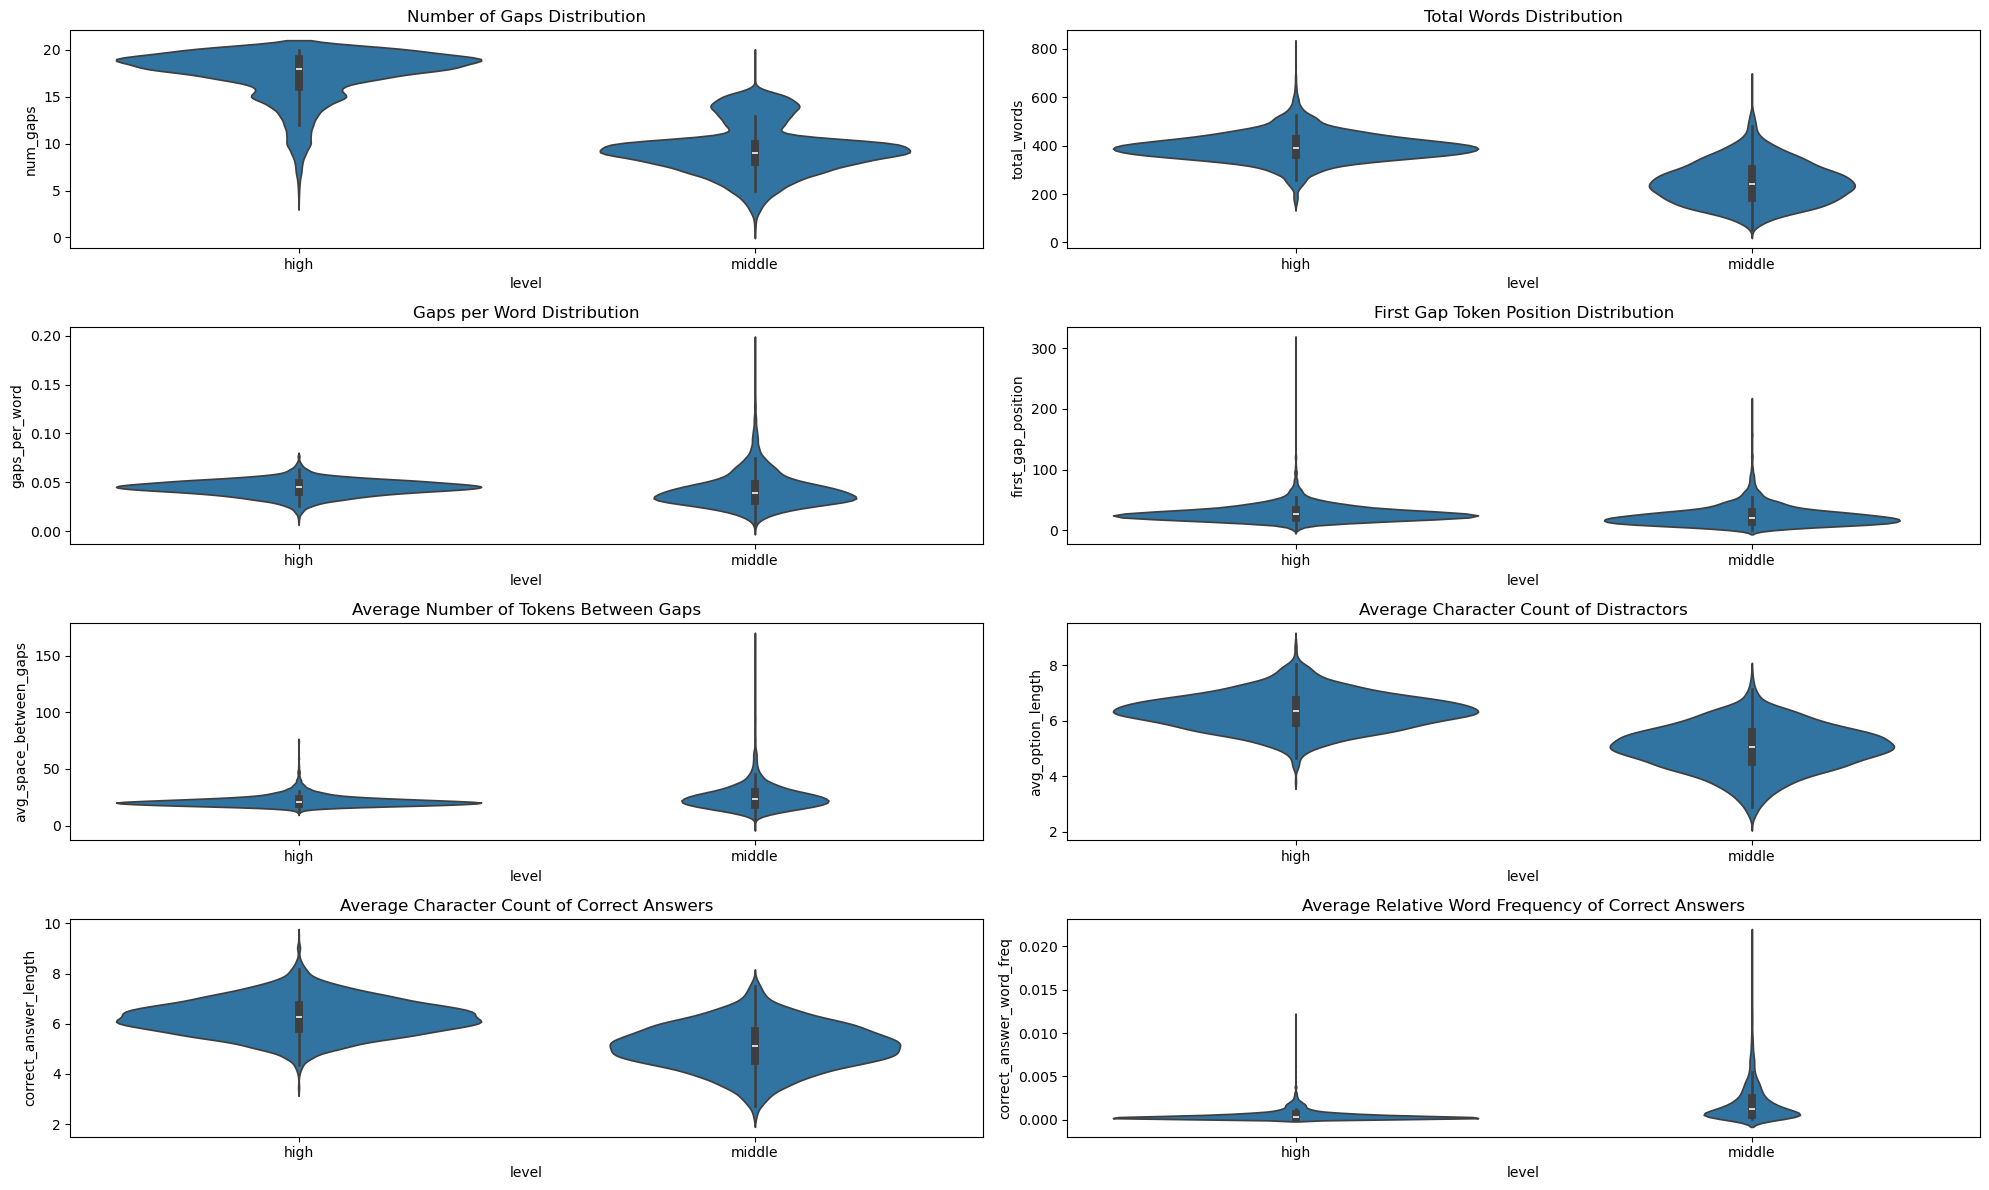

In [146]:
# Set up the plotting style and figure
fig, axes = plt.subplots(4, 2, figsize=(20, 12))

# Create violin plots for each metric
sns.violinplot(data=metrics_df, x='level', y='num_gaps', ax=axes[0,0])
axes[0,0].set_title('Number of Gaps Distribution')

sns.violinplot(data=metrics_df, x='level', y='total_words', ax=axes[0,1])
axes[0,1].set_title('Total Words Distribution')

sns.violinplot(data=metrics_df, x='level', y='gaps_per_word', ax=axes[1,0])
axes[1,0].set_title('Gaps per Word Distribution')

sns.violinplot(data=metrics_df, x='level', y='first_gap_position', ax=axes[1,1])
axes[1,1].set_title('First Gap Token Position Distribution')

sns.violinplot(data=metrics_df, x='level', y='avg_space_between_gaps', ax=axes[2,0])
axes[2,0].set_title('Average Number of Tokens Between Gaps')

sns.violinplot(data=metrics_df, x='level', y='avg_option_length', ax=axes[2,1])
axes[2,1].set_title('Average Character Count of Distractors')

sns.violinplot(data=metrics_df, x='level', y='correct_answer_length', ax=axes[3,0])
axes[3,0].set_title('Average Character Count of Correct Answers')

sns.violinplot(data=metrics_df, x='level', y='correct_answer_word_freq', ax=axes[3,1])
axes[3,1].set_title('Average Relative Word Frequency of Correct Answers')

# Adjust layout
plt.tight_layout()
plt.show()

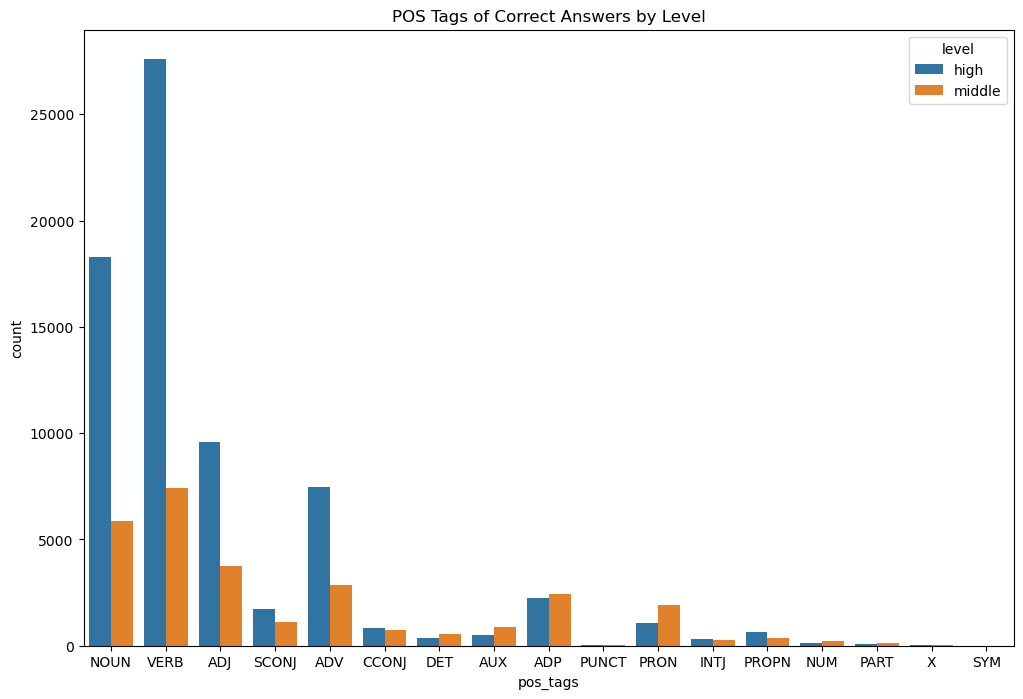

In [168]:
# Visualize POS Tags
plt.figure(figsize=(12, 8))
sns.countplot(exploded_df, x="pos_tags", hue="level")
plt.title('POS Tags of Correct Answers by Level')
plt.show()

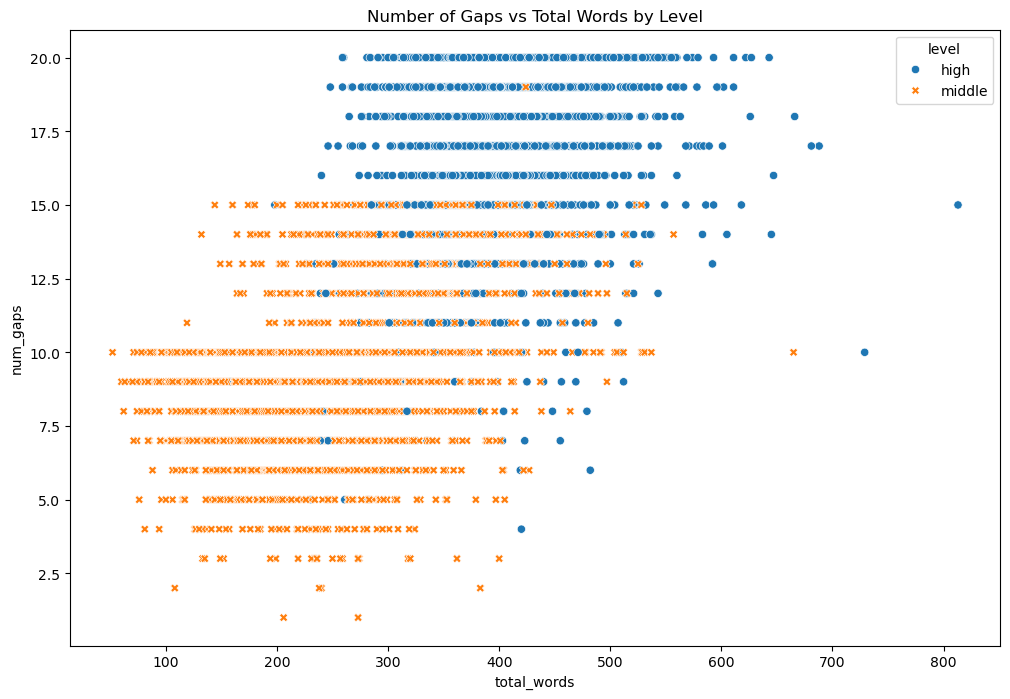

In [105]:
# Create a scatter plot to show relationships
plt.figure(figsize=(12, 8))
sns.scatterplot(data=metrics_df, x='total_words', y='num_gaps', hue='level', style='level')
plt.title('Number of Gaps vs Total Words by Level')
plt.show()